<a href="https://colab.research.google.com/github/PrachitiSParulekar/miniTask/blob/main/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1: Feature Engineering Pipeline

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.25M/1.25M [00:00<00:00, 108MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1


In [8]:
import pandas as pd
import os

print(os.listdir(path))

['Telco_customer_churn.xlsx']


In [10]:
dataset = pd.read_excel(os.path.join(path, "Telco_customer_churn.xlsx"))

In [11]:
dataset.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
dataset.shape

(7043, 33)

EDA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip Code,int64
Lat Long,object
Latitude,float64
Longitude,float64
Gender,object


In [16]:
print(f"\nTarget distribution:\n{dataset['Churn Label'].value_counts(normalize=True)}")


Target distribution:
Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


1. Missing Values Analysis

In [18]:
# Check missing values
missing = dataset.isnull().sum()
missing_pct = (missing / len(dataset)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print("Missing Values:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for empty strings (common in TotalCharges)
print(f"\nEmpty TotalCharges: {(dataset['Total Charges'] == ' ').sum()}")

Missing Values:
              Missing_Count  Percentage
Churn Reason           5174   73.463013

Empty TotalCharges: 11


2. Numerical Features Distribution

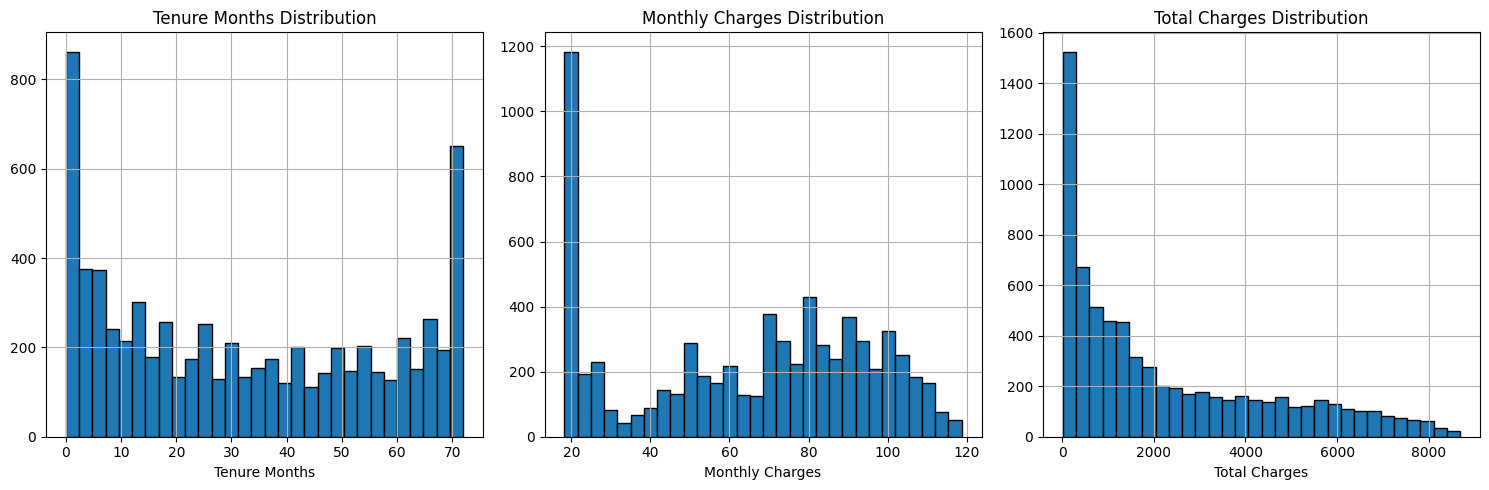

In [30]:
# Identify numerical columns
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']

# Distribution plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(numerical_cols):
    if col == 'Total Charges':
        # Convert to numeric (handles spaces)
        dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

    dataset[col].hist(bins=30, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

In [31]:
# Summary statistics
print(dataset[numerical_cols].describe())

       Tenure Months  Monthly Charges  Total Charges
count    7043.000000      7043.000000    7032.000000
mean       32.371149        64.761692    2283.300441
std        24.559481        30.090047    2266.771362
min         0.000000        18.250000      18.800000
25%         9.000000        35.500000     401.450000
50%        29.000000        70.350000    1397.475000
75%        55.000000        89.850000    3794.737500
max        72.000000       118.750000    8684.800000


3. Correlation Analysis

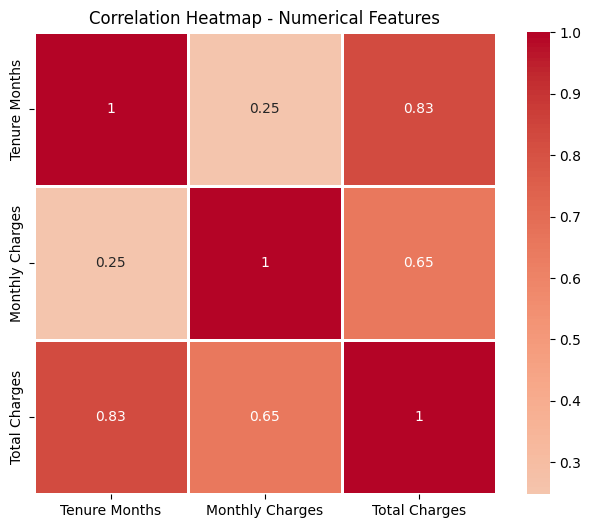

In [33]:
# Correlation heatmap for numerical features
correlation = dataset[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

4. Categorical Features Analysis

In [39]:
# Get categorical columns
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('CustomerID')  # Remove ID (corrected from 'customerID')
categorical_cols.remove('Churn Label')  # Remove target (corrected from 'Churn')

print(f"Categorical features: {len(categorical_cols)}")

Categorical features: 21


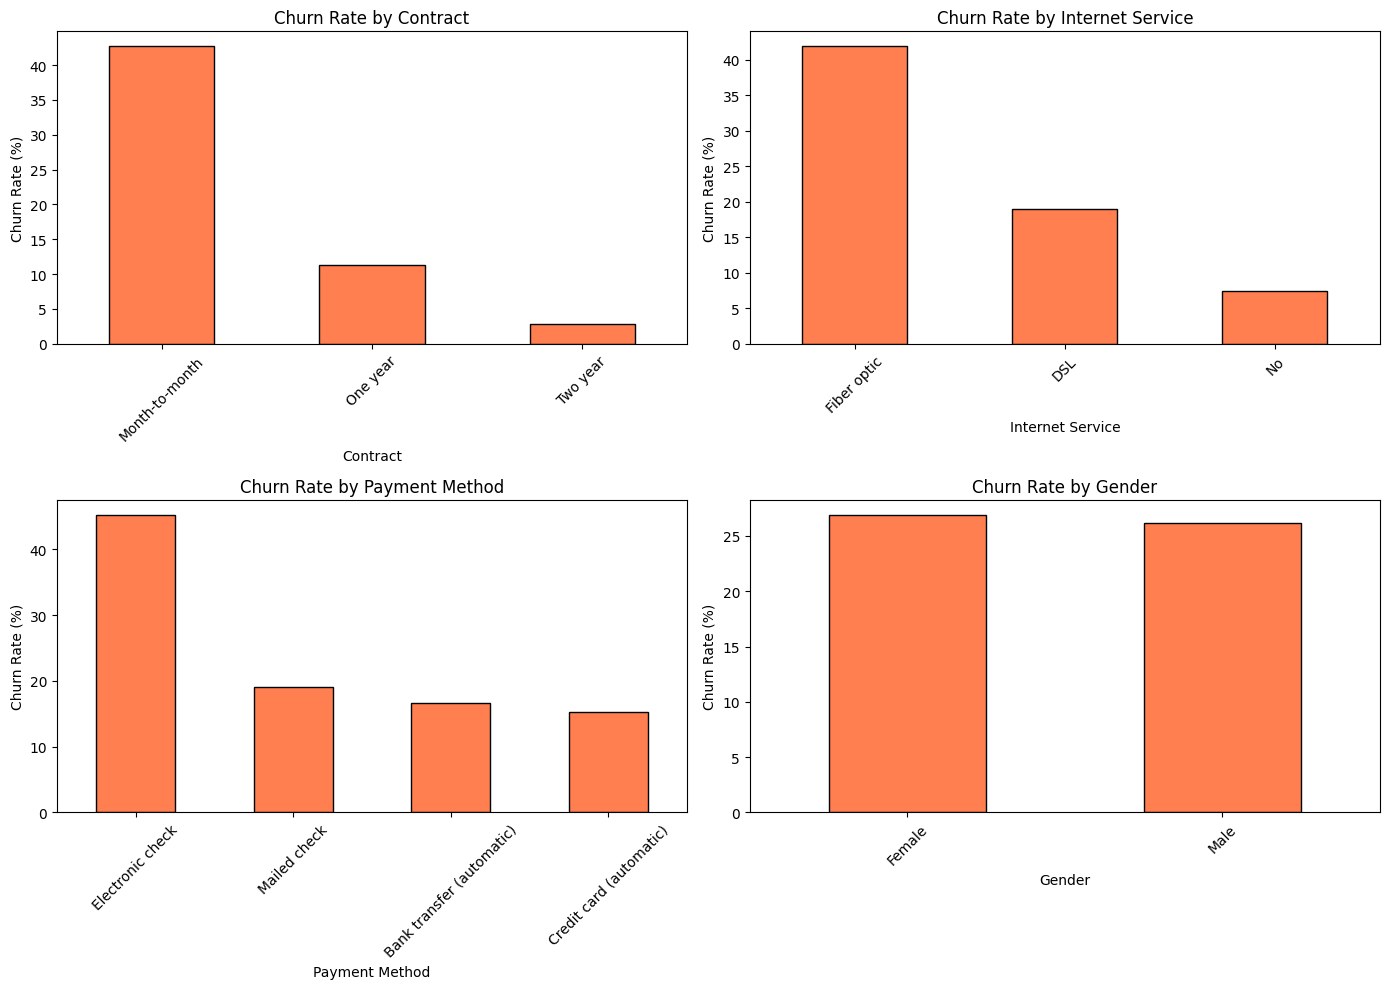

In [40]:
# Churn rate by key categorical features
key_cats = ['Contract', 'Internet Service', 'Payment Method', 'Gender'] # Corrected column names

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(key_cats):
    churn_rate = dataset.groupby(col)['Churn Label'].apply(
        lambda x: (x == 'Yes').sum() / len(x) * 100
    ).sort_values(ascending=False)

    churn_rate.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
    axes[idx].set_title(f'Churn Rate by {col}')
    axes[idx].set_ylabel('Churn Rate (%)')
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

5. Domain Reasoning - Tenure Analysis

/tmp/ipython-input-2804746211.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = dataset.groupby('tenure_group')['Churn Label'].apply(


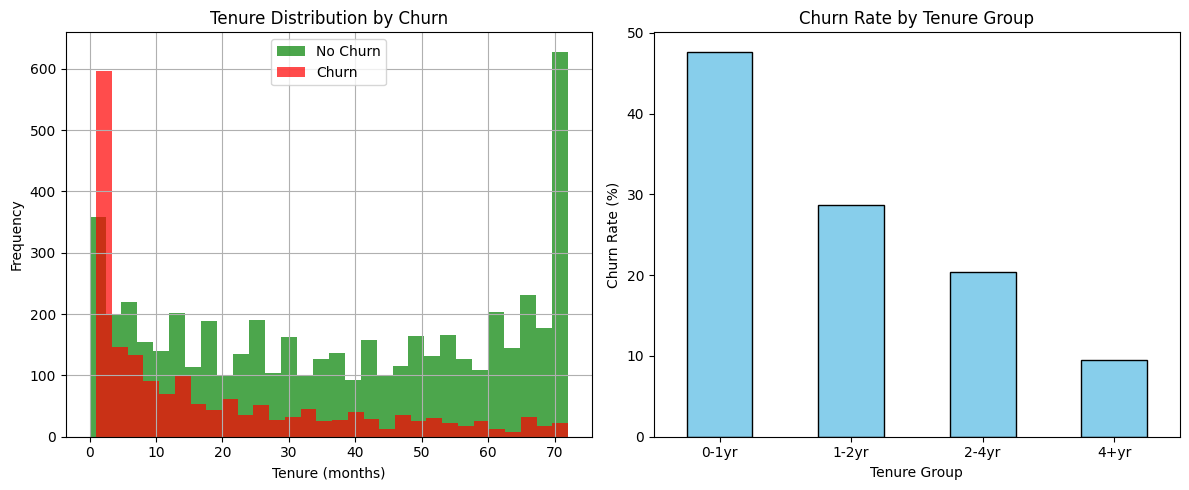


Key Insight: Early customers (< 1 year) have highest churn risk


In [43]:
# Tenure vs Churn (critical insight)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dataset[dataset['Churn Label']=='No']['Tenure Months'].hist(bins=30, alpha=0.7, label='No Churn', color='green')
dataset[dataset['Churn Label']=='Yes']['Tenure Months'].hist(bins=30, alpha=0.7, label='Churn', color='red')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.title('Tenure Distribution by Churn')
plt.legend()

plt.subplot(1, 2, 2)
# Churn rate by tenure bins
dataset['tenure_group'] = pd.cut(dataset['Tenure Months'], bins=[0, 12, 24, 48, 72],
                              labels=['0-1yr', '1-2yr', '2-4yr', '4+yr'])
churn_by_tenure = dataset.groupby('tenure_group')['Churn Label'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)
churn_by_tenure.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\nKey Insight: Early customers (< 1 year) have highest churn risk")